In [1]:
import matplotlib as mpl
import networkx as nx
import visJS2jupyter.visJS_module
%matplotlib inline

# Create a graph 

### 1. Undirected

In [2]:
G=nx.Graph()

In [3]:
G.add_edge('A','B', weight=6)
G.add_edge('C','B', weight=13)
G.add_edge('C','F', weight=21)
G.add_edge('C','E', weight=25)
G.add_edge('C','B', weight=13)
G.add_edge('G','F', weight=9)
G.add_edge('D','E', weight=2)
G.add_edge('E','H', weight=9)
G.add_edge('I','E', weight=10)
G.add_edge('J','E', weight=15)
G.add_edge('I','J', weight=3)

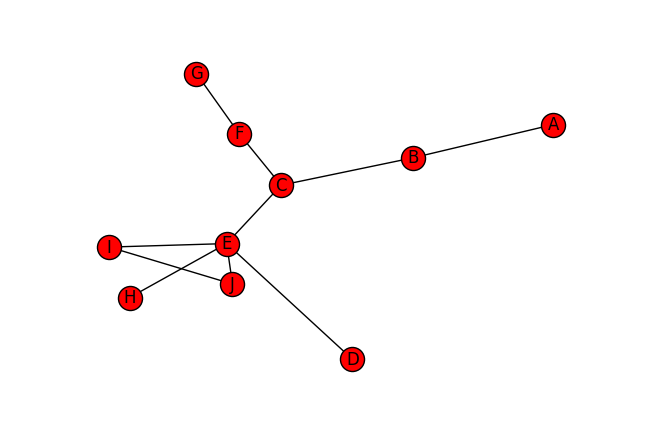

In [4]:
nx.draw(G,with_labels=True) ## undirected graph

## 2. Directed

In [5]:
G1=nx.DiGraph()

| Species      | Species they feed on     |
|--------------|--------------------------|
| Shark        | Sea otters               |
| Sea otter    | Large crabs, Sea urchins |
| Large crabs  | Small fishes             |
| Sea urchins  | Kelp                     |
| Small fishes | Kelp                     |
| Kelp         | ----                     |

In [6]:
G1.add_edge('Kelp','Small fishes', weight=21)
G1.add_edge('Kelp','Sea urchins', weight=20)
G1.add_edge('Sea urchins','Sea otters', weight=25)
G1.add_edge('Small fishes','Large crabs', weight=26)
G1.add_edge('Large crabs','Sea otters', weight=27)
G1.add_edge('Sea otters','Sharks', weight=29)

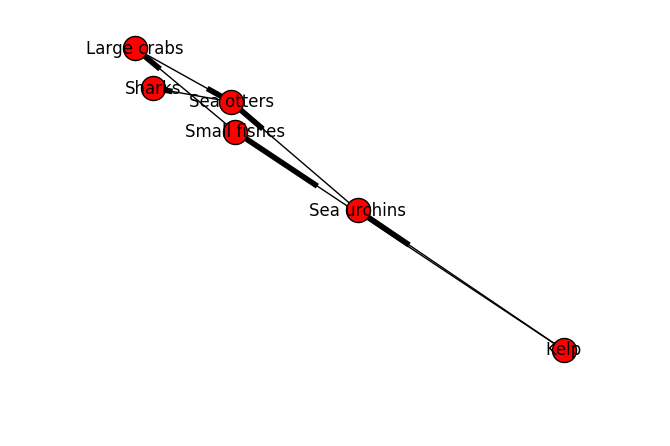

In [7]:
nx.draw(G1,with_labels=True) ## directed

## 3. Multigraph

In [8]:
G2 = nx.MultiGraph()

In [9]:
G2.add_edge('A','B', weight=16, relation = 'family')
G2.add_edge('A','B', weight=14, relation = 'friend')
G2.add_edge('C','B', weight=13, relation='friend')
G2.add_edge('C','F', weight=27, relation='labmate')
G2.add_edge('C','E', weight=25, relation='neighbor')
G2.add_edge('C','B', weight=10, relation='friend')
G2.add_edge('G','F', weight=7, relation='friend')
G2.add_edge('D','E', weight=13, relation='labmate')
G2.add_edge('E','H', weight=9, relation='labmate')
G2.add_edge('I','E', weight=6, relation='labmate')
G2.add_edge('J','E', weight=15, relation='family')
G2.add_edge('I','J', weight=3, relation='labmate')

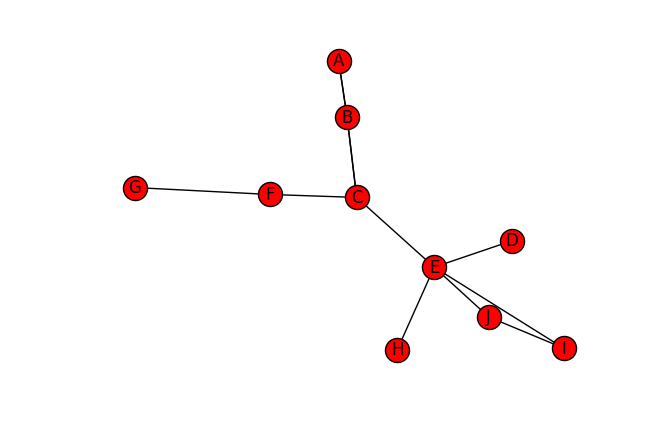

In [10]:
nx.draw(G2,with_labels=True) ## mulrigraph

In [11]:
G2.edge['A']['B'] # one dictionary of attributes per (A,B) edge

{0: {'relation': 'family', 'weight': 16},
 1: {'relation': 'friend', 'weight': 14}}

In [12]:
G2.edges(data=True)

[('A', 'B', {'relation': 'family', 'weight': 16}),
 ('A', 'B', {'relation': 'friend', 'weight': 14}),
 ('C', 'B', {'relation': 'friend', 'weight': 13}),
 ('C', 'B', {'relation': 'friend', 'weight': 10}),
 ('C', 'E', {'relation': 'neighbor', 'weight': 25}),
 ('C', 'F', {'relation': 'labmate', 'weight': 27}),
 ('E', 'I', {'relation': 'labmate', 'weight': 6}),
 ('E', 'H', {'relation': 'labmate', 'weight': 9}),
 ('E', 'J', {'relation': 'family', 'weight': 15}),
 ('E', 'D', {'relation': 'labmate', 'weight': 13}),
 ('G', 'F', {'relation': 'friend', 'weight': 7}),
 ('I', 'J', {'relation': 'labmate', 'weight': 3})]

# Compute centrality based node attibutes
* Degree Centrality
* Closeness Centrality
* Betwenness Centrality

In [13]:
degree_c = nx.degree_centrality(G)
degree = G.degree()

In [14]:
n_size = [v * 100 for v in degree.values()]

In [15]:
n_size_c = [v * 1000 for v in degree_c.values()]

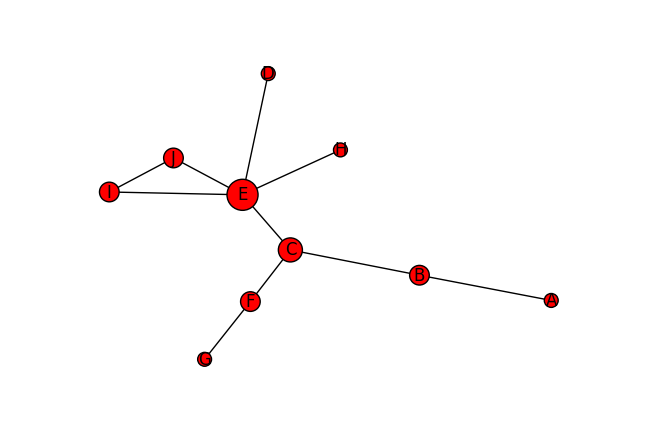

In [16]:
nx.draw(G,node_size=n_size,with_labels=True)

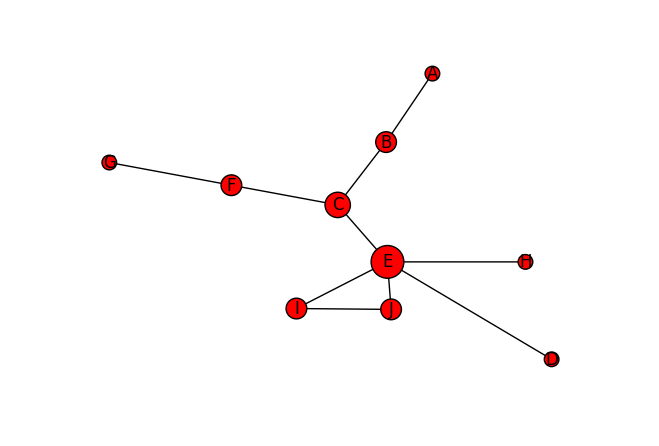

In [17]:
nx.draw(G,node_size=n_size_c,with_labels=True)

* #### Indegree and Outdegree

## Closeness Centrality

In [18]:
nx.shortest_path(G,'G','C')

['G', 'F', 'C']

In [19]:
nx.shortest_path_length(G,'G','C')

2

In [20]:
co = nx.closeness_centrality(G)

In [21]:
cco = [v * 1000 for v in co.values()]

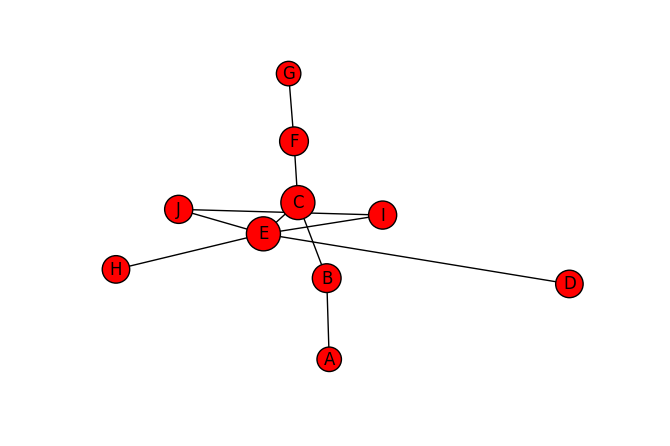

In [22]:
nx.draw(G,node_size=cco,with_labels=True)

## Betweenness centrality 

In [23]:
bc = nx.betweenness_centrality(G)

In [24]:
bcc = [v * 1000 for v in bc.values()]

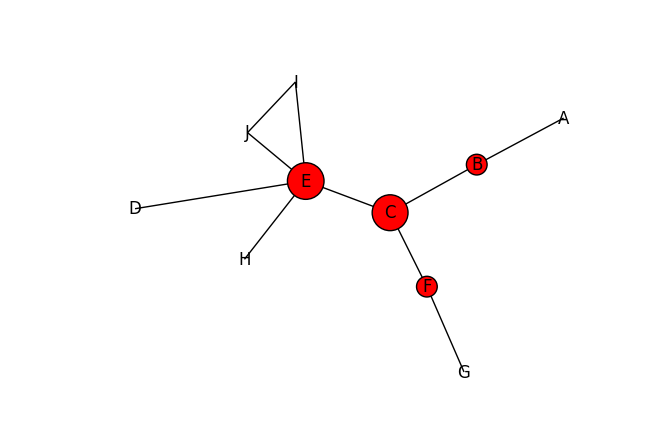

In [25]:
nx.draw(G,node_size=bcc,with_labels=True)

## Read in a graph

### Bacteria _Klebsiella terrigena_ genome

In [27]:
B1 = nx.read_gml('../data/kr_ter.gml')
nodes = B1.nodes()
edges = B1.edges()

In [28]:
degree = nx.degree_centrality(B1)
co = nx.closeness_centrality(B1)
bc = nx.betweenness_centrality(B1)
nx.set_node_attributes(B1,'degree',degree)
nx.set_node_attributes(B1,'betweenness_centrality',bc)

In [29]:
bcc = [v * 1000 for v in bc.values()]

In [30]:
node_to_color = visJS2jupyter.visJS_module.return_node_to_color(B1,field_to_map='betweenness_centrality',cmap=mpl.cm.spring_r,alpha = 1,
                                                 color_max_frac = .9,color_min_frac = .1)

# set node initial positions using networkx's spring_layout function
pos = nx.spring_layout(B1)

bcc = [v * 1000 for v in bc.values()]
node_labels = nx.get_node_attributes(B1,'name')

nodes_dict = [{"id":node_labels[n],"color":node_to_color[n],
               "degree":nx.degree(B1,n),
               "node_label":node_labels[n],
               "node_size":bcc[n],
               "x":pos[n][0]*1000,
               "y":pos[n][1]*1000} for n in nodes]


node_map = dict(zip(nodes,range(len(nodes))))  # map to indices for source/target in edges
 

edges_dict = [{"source":node_map[edges[i][0]], "target":node_map[edges[i][1]], 
            "color":"gray","title":'test'} for i in range(len(edges))]

# set some network-wide styles
visJS2jupyter.visJS_module.visjs_network(nodes_dict,edges_dict,
                          node_size_multiplier=7,
                          node_size_field='node_size',
                          node_size_transform = '',
                          node_color_highlight_border='red',
                          node_color_highlight_background='#D3918B',
                          node_color_hover_border='blue',
                          node_color_hover_background='#8BADD3',
                          node_font_size=25,
                          node_label_field='node_label',               
                          edge_arrow_to=True,
                          physics_enabled=True,
                          edge_color_highlight='#8A324E',
                          edge_color_hover='#8BADD3',
                          edge_width=1,
                          max_velocity=15,
                          min_velocity=1,
                          graph_id="0")

### Dolphins

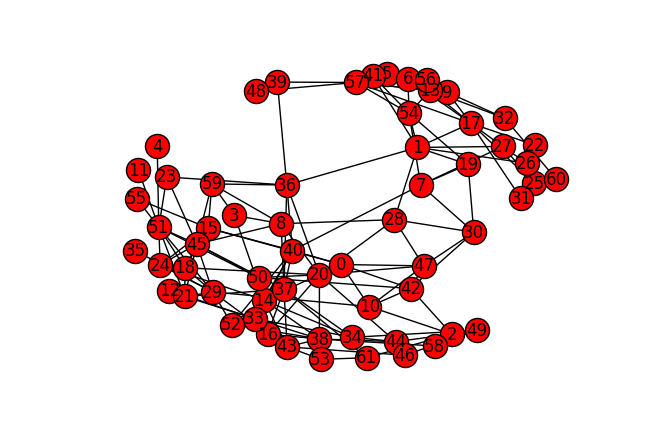

In [31]:
Gd = nx.read_gml('../data/dolphins.gml')

nodes = Gd.nodes()
edges = Gd.edges()

nx.draw(Gd, with_labels=True)

In [42]:
degree_sorted =sorted(nx.degree(Gd).values(),reverse=True)
dmax=max(degree_sorted)
print degree.keys()[degree.values().index(12)]

14


In [32]:
degreeCen = nx.degree_centrality(Gd)
nx.set_node_attributes(Gd,'degree_c',degreeCen)
dcen_sorted =sorted(nx.degree_centrality(Gd).values(),reverse=True)
dmax=max(dcen_sorted)
print degreeCen.keys()[degreeCen.values().index(dmax)]

14


In [33]:
close_cen = nx.closeness_centrality(Gd)
nx.set_node_attributes(Gd,'close_c',close_cen)
closec_sorted =sorted(nx.closeness_centrality(Gd).values(),reverse=True)
dmax=max(closec_sorted)
print close_cen.keys()[close_cen.values().index(dmax)]

36


In [34]:
bc = nx.betweenness_centrality(Gd)
nx.set_node_attributes(Gd,'betweenness_centrality',bc)
bc_sorted =sorted(nx.betweenness_centrality(Gd).values(),reverse=True)
dmax=max(bc_sorted)
print bc.keys()[bc.values().index(dmax)]

36


In [35]:
node_to_color = visJS2jupyter.visJS_module.return_node_to_color(Gd,field_to_map='betweenness_centrality',cmap=mpl.cm.spring_r,alpha = 1,
                                                 color_max_frac = .9,color_min_frac = .1)

# set node initial positions using networkx's spring_layout function
pos = nx.spring_layout(Gd)

node_labels = nx.get_node_attributes(Gd,'label')

nodes_dict = [{"id":n,"color":node_to_color[n],
               "degree":nx.degree(Gd,n),
               "node_label":node_labels[n],
              "x":pos[n][0]*1000,
              "y":pos[n][1]*1000} for n in nodes
              ]
node_map = dict(zip(nodes,range(len(nodes))))  # map to indices for source/target in edges
edges_dict = [{"source":node_map[edges[i][0]], "target":node_map[edges[i][1]], 
              "color":"gray","title":'test'} for i in range(len(edges))]

# set some network-wide styles
visJS2jupyter.visJS_module.visjs_network(nodes_dict,edges_dict,
                          node_size_multiplier=7,
                          node_size_transform = '',
                          node_color_highlight_border='red',
                          node_color_highlight_background='#D3918B',
                          node_color_hover_border='blue',
                          node_color_hover_background='#8BADD3',
                          node_font_size=25,
                          node_label_field='node_label',               
                          edge_arrow_to=False,
                          physics_enabled=True,
                          edge_color_highlight='#8A324E',
                          edge_color_hover='#8BADD3',
                          edge_width=3,
                          max_velocity=15,
                          min_velocity=1,
                          graph_id="1")